## Final Project Submission

Please fill out:
* Student name: Juico Bowley
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Rafael Carassco


Potential questions:
- Predict prices with proximity to hopsitals
- predict prices with proximity to breweries
- predict prices with proximity to high crime areas
- predict prices with proximity to schools?

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd

import scipy.stats as scs 
import statsmodels.api as sm


from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsFunctions as sf

In [2]:
!conda env list

# conda environments:
#
base                  *  C:\ProgramData\Anaconda3
gis                      C:\ProgramData\Anaconda3\envs\gis
learn-env                C:\ProgramData\Anaconda3\envs\learn-env



In [3]:
df = pd.read_csv("./data/cleaned_data.csv")
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bed_to_bath,has_basement
0,0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3.000000,0.0
1,1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.333333,1.0
2,3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.333333,1.0
3,4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.500000,0.0
4,6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,1.333333,0.0


In [4]:
# identifying features based on correlation
target = 'price'
columns_correlations = []
columns_non_numeric = []

for column in df.drop(columns=[target]).columns:
    try:
        corr = np.abs(df[column].corr(df[target]))
        t = (column, corr)
        columns_correlations.append(t)
    except:
        columns_non_numeric.append(column)

In [5]:
columns_correlations = sorted(columns_correlations, key = lambda x: x[1], reverse=True)
columns_correlations

[('grade', 0.6146288066652135),
 ('sqft_living', 0.6029604452313202),
 ('sqft_living15', 0.4957095583416667),
 ('sqft_above', 0.4803237669626364),
 ('lat', 0.4366589922184454),
 ('bathrooms', 0.4239937978638972),
 ('view', 0.30055984432094873),
 ('bedrooms', 0.29015371190856126),
 ('sqft_basement', 0.2897713859608545),
 ('floors', 0.27148086975953967),
 ('has_basement', 0.22061703661897838),
 ('bed_to_bath', 0.2097746264466295),
 ('yr_renovated', 0.11610468650643335),
 ('sqft_lot15', 0.08765839272078836),
 ('sqft_lot', 0.07914180954282464),
 ('waterfront', 0.06537599052817657),
 ('zipcode', 0.06372764301010346),
 ('Unnamed: 0', 0.05615629113937057),
 ('condition', 0.05573315402629177),
 ('long', 0.02604058333459942),
 ('yr_built', 0.02405162143101082),
 ('id', 0.012993136307963284)]

In [6]:
correlated_features_above_2 = [t[0] for t in columns_correlations if t[1] >= 0.15]
correlated_features_above_2

['grade',
 'sqft_living',
 'sqft_living15',
 'sqft_above',
 'lat',
 'bathrooms',
 'view',
 'bedrooms',
 'sqft_basement',
 'floors',
 'has_basement',
 'bed_to_bath']

In [7]:
whole_space = correlated_features_above_2
whole_space.append(target)

In [8]:
correlated_df = df[whole_space]

In [9]:
correlated_df.head()

,grade,sqft_living,sqft_living15,sqft_above,lat,bathrooms,view,bedrooms,sqft_basement,floors,has_basement,bed_to_bath,price
0,7,1180,1340,1180,47.5112,1.00,0.0,3,0.0,1.0,0.0,3.000000,221900.0
1,7,2570,1690,2170,47.7210,2.25,0.0,3,400.0,2.0,1.0,1.333333,538000.0
2,7,1960,1360,1050,47.5208,3.00,0.0,4,910.0,1.0,1.0,1.333333,604000.0
3,8,1680,1800,1680,47.6168,2.00,0.0,3,0.0,1.0,0.0,1.500000,510000.0
4,7,1715,2238,1715,47.3097,2.25,0.0,3,0.0,2.0,0.0,1.333333,257500.0


In [10]:
# pd.plotting.scatter_matrix(correlated_df, figsize=(20, 20));

In [11]:
ols = sf.check_model(correlated_df, features_to_use=correlated_features_above_2, target_col=target)
ols

grade surpassed threshold with vif=165.81736673718834
sqft_living surpassed threshold with vif=929.888752445134
sqft_living15 surpassed threshold with vif=29.673689845651612
sqft_above surpassed threshold with vif=701.0800686455735
lat surpassed threshold with vif=157.436462505733
bathrooms surpassed threshold with vif=97.4638720274311
bedrooms surpassed threshold with vif=85.31175274268367
sqft_basement surpassed threshold with vif=51.46314055131245
floors surpassed threshold with vif=17.087479698372867
has_basement surpassed threshold with vif=6.063285513557443
bed_to_bath surpassed threshold with vif=56.82577570657707
price surpassed threshold with vif=10.531912436335256
Model contains multicollinear features
Residuals failed test/tests


In [12]:

# drop sqft_living, grade, sqft_above, sqft_living15, lat
correlated_features_high_vif = ['sqft_living', 'sqft_basement', 'sqft_above', 'sqft_living15', 'lat', target, 'bathrooms', 'bedrooms', 'floors']
correlated_features_low_vif = []

for i in correlated_features_above_2:
    if i not in correlated_features_high_vif:
        correlated_features_low_vif.append(i)
correlated_features_low_vif


['grade', 'view', 'has_basement', 'bed_to_bath']

In [13]:
ols = sf.check_model(correlated_df, features_to_use=correlated_features_low_vif, target_col=target, show_summary=True)
ols

grade surpassed threshold with vif=6.550800929023444
bed_to_bath surpassed threshold with vif=5.870033632080788
Model contains multicollinear features
                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          2.819e+04
Date:                Tue, 06 Oct 2020   Prob (F-statistic):                        0.00
Time:                        13:52:36   Log-Likelihood:                     -2.0599e+05
No. Observations:               15217   AIC:                                  4.120e+05
Df Residuals:                   15213   BIC:                                  4.120e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                    

In [14]:
sf.check_residuals_normal(ols)

False

In [15]:
sf.check_residuals_homoskedasticity(ols)

False

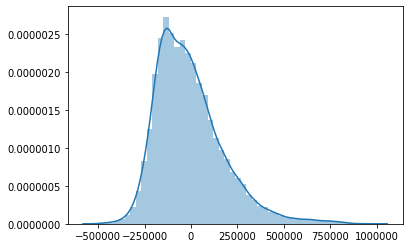

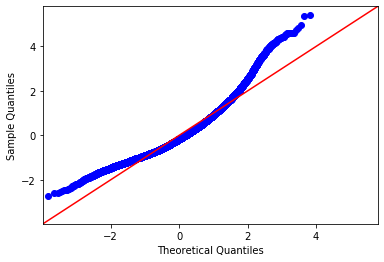

In [16]:
sns.distplot(ols.resid)
fig = sm.graphics.qqplot(ols.resid, dist=scs.norm, line='45', fit=True)


In [28]:
sns.scatterplot(ols.resid)

ValueError: Either both or neither of `x` and `y` must be specified (but try passing to `data`, which is more flexible).

In [ ]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])


In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'waterfront', fig=fig)
plt.show()


In [17]:
linear = LinearRegression(fit_intercept=False)

In [18]:
ols.rsquared

0.8811178801030105

In [19]:
X = correlated_df[correlated_features_low_vif]
y = correlated_df[target]

In [20]:
cross_val_score(linear, X, y, n_jobs=-1, cv=5, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.9s finished


array([0.34822769, 0.36915777, 0.37377615, 0.38693354, 0.35213969])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [22]:
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [23]:
linear.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [24]:
linear.score(X,y)

0.36982450759230534

In [25]:
linear.coef_

array([ 71903.74744207,  81417.44652997,  68506.50372346, -50612.24384173])

In [26]:
linear.score(X_train, y_train), linear.score(X_test, y_test)

(0.372458576842991, 0.3552540320553262)